<a href="https://colab.research.google.com/github/vineethajallipalli/Vineetha/blob/main/Mini_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Install necessary libraries
!pip install tensorflow matplotlib plotly

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [23]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
# Normalize the images to a range of 0 to 1 and reshape for compatibility with the model
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Rebuild the model for certainty
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
# Summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.8887 - loss: 0.3734 - val_accuracy: 0.9835 - val_loss: 0.0474
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9835 - loss: 0.0540 - val_accuracy: 0.9882 - val_loss: 0.0331
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9893 - val_loss: 0.0310
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9925 - loss: 0.0249 - val_accuracy: 0.9905 - val_loss: 0.0304
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9921 - val_loss: 0.0290


In [30]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9887 - loss: 0.0397
Test Accuracy: 0.9921000003814697, Test Loss: 0.029030419886112213


In [31]:

# Make predictions and display results
predictions = model.predict(x_test[:5])  # Predict for the first 5 test images
print(predictions)  # These are the predicted probabilities for each class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[[2.09899784e-12 2.50886796e-08 9.35104651e-08 2.92714617e-07
  1.24850108e-09 1.67589637e-10 5.28662114e-16 9.99999642e-01
  1.63884892e-10 3.36546222e-08]
 [8.27117841e-09 9.38383954e-11 1.00000000e+00 4.56964219e-13
  6.76120076e-13 4.85240195e-18 1.33664690e-09 2.95979976e-14
  3.09228441e-11 4.18413735e-16]
 [3.22180078e-08 9.99883294e-01 6.84647318e-07 8.49291540e-11
  1.05910083e-04 3.10631023e-08 3.38162067e-07 9.67105916e-06
  6.37378363e-08 9.34503319e-09]
 [9.99992013e-01 7.28681091e-12 8.21605738e-07 4.87645551e-08
  5.56063307e-10 4.38020678e-08 7.01581121e-06 1.98867198e-08
  4.31182912e-08 1.19809185e-08]
 [3.27457145e-10 1.04238742e-08 2.53945576e-08 1.03710973e-09
  9.99910831e-01 5.35750777e-09 1.40913126e-09 9.25318915e-08
  9.91654829e-08 8.89174480e-05]]


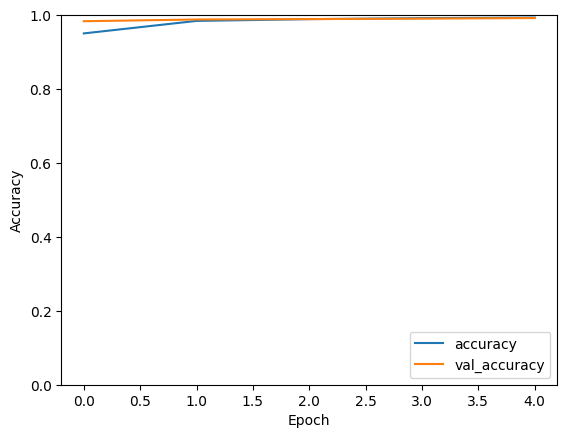

In [32]:
# Plot the training and validation accuracy/loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

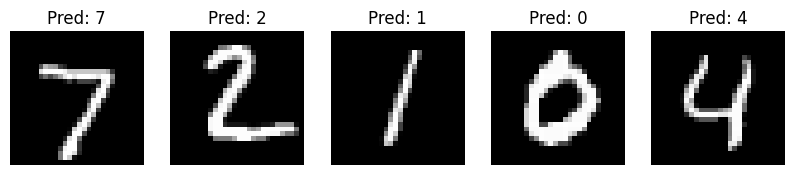

In [33]:
# Show some images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()